Want to understand difference between computing number of successes and failures separate vs treating them as one blob.

Is there something that approximately holds? It appears so.

Background is roughly to do with computing likelihood of binomial data given Beta prior on probability $q$ of success:

$$ P(Y|\alpha, \beta) = ... = \frac{B(\alpha + s, \beta + f)}{B(\alpha, \beta)} $$

Problem is, that the integration in the ... means that you need to worry about interaction between samples (i.e. success > 1) which makes doing the usual optimization of cost function more tricky. However, it seems like if there are few collisions (same parts of feature space) and succ/failure almost always 0 or 1 ... then the approximation is closish. So you might try to use a likelihood like

$$ \prod_i \frac{1}{B(\alpha, \beta)}B(\alpha+1, \beta)^{Y_i}B(\alpha, \beta+1)^{1 - Y_i} $$

where $\alpha = \alpha(X_i), \beta = \beta(X_i)$

Gradients:

Use $\partial_x \ln B(x, y) = \Psi(x) - \Psi(x+y)$ where $\Psi$ is digamma

$$ \partial_{\alpha}J_i = Y_i (\alpha - 1) \Psi_{\alpha} + (1 - \alpha - \beta) \Psi_{\alpha+\beta} $$

$$ \partial_{\beta}J_i = (1 - Y_i)(1-\beta) \Psi_{\beta} + (1 - \alpha - \beta)\Psi_{\alpha+\beta} $$

$$ \Psi(a) = \Gamma'(a) / \Gamma(a) $$

In [13]:
from scipy.special import beta

In [14]:
x = linspace(1, 10) # range for alpha and beta

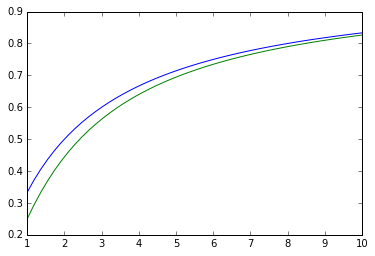

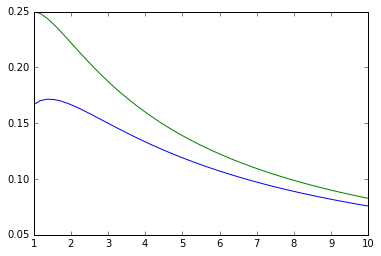

In [15]:
%matplotlib inline
n = 2
beta0 = 1
for i in range(n):
    succ = n - i
    fail = i
    f = lambda a, b: beta(a + succ, b + fail) / beta(a, b) # exact
    g = lambda a, b: (beta(a + 1, b) ** succ) * (beta(a, b + 1) ** fail) / (beta(a, b) ** (succ + fail)) # 'approx'
    fy = f(x, beta0)
    gy = g(x, beta0)
    figure(i)
    clf()
    plot(x, fy)
    plot(x, gy)
    

In [ ]:
def dJ(alpha, beta, Y):
    dJalpha = Y * (alpha - 1) * psi(alpha) + (1 - alpha - beta) * psi(alpha + beta)
    

In [ ]:
# user define objective function, given prediction, return gradient and second order gradient
# this is loglikelihood loss
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    # preds will be alpha and beta
    
    #     preds = 1.0 / (1.0 + np.exp(-preds))
    #     grad = preds - labels
    #     hess = preds * (1.0-preds)
    return grad, hess